<a href="https://colab.research.google.com/github/Nayoung-young/prj-funnel-analysis/blob/main/user_funnel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _0. 프로젝트 설명

> `목적: 어떤 퍼널에서 유저들이 가장 많이 이탈하고 있는가? `

- 2021-04-23부터 2021-04-29까지 7일 간의 모바일 서비스 유저 데이터를 통한 퍼널 분석

- 퍼널 필드의 레코드: 퍼널별 유저 체류 시간



In [3]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings
warnings.filterwarnings('ignore')

# _1. 데이터 불러오기

In [4]:
%%time
df = pd.read_csv('/content/drive/MyDrive/dataset_2023/개인프로젝트/funnel_sample_final.csv')
df_base = df.copy()

CPU times: user 7.33 s, sys: 2.19 s, total: 9.52 s
Wall time: 11.1 s


In [5]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_inflowed            int64  
 4   se_joined              float64
 5   se_cert_pv             float64
 6   se_cert_done           float64
 7   se_tax_calculation     float64
 8   se_tax_check           float64
 9   se_pay_pv              float64
 10  se_is_not_target       float64
 11  se_ref                 float64
 12  se_ref_kt              float64
 13  se_ref_lk              float64
 14  se_additional_info_pv  float64
 15  se_add_done            float64
 16  se_edit_done           float64
 17  se_save_done           float64
 18  et_inflowed            object 
 19  et_joined              object 
 20  et_cert_pv             object 
 21  et_cert_done           object 
 22  et_tax_calculation

In [6]:
df_base.sample(5)

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,...,et_tax_check,et_pay_pv,et_is_not_target,et_ref,et_ref_kt,et_ref_lk,et_additional_info_pv,et_add_done,et_edit_done,et_save_done
846288,2021-04-23,13,Unknown,1650688621809,1.650689e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139717,2021-04-26,12,Unknown,1650944665737,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488928,2021-04-28,1,Unknown,1651078791395,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1585981,2021-04-27,11,Unknown,1651026382499,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904685,2021-04-28,14,20s,1651125230080,1.651125e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_base.et_inflowed.sample(5)

1202300    2021-04-23 14:05:40.507
17369      2021-04-27 13:23:02.514
1397956    2021-04-27 10:14:54.321
1741896    2021-04-28 18:53:16.964
1329816    2021-04-25 14:46:16.499
Name: et_inflowed, dtype: object

In [7]:
print(df_base.hours.min())
print(df_base.hours.max()) # hours = 시간

0
23


In [8]:
from datetime import datetime

print(pd.to_datetime(df_base.dates).min())
print(pd.to_datetime(df_base.dates).max())


2021-04-23 00:00:00
2021-04-29 00:00:00


In [9]:
df_base.age_layer.unique()

array(['Unknown', '40s', '20s', '50s', '30s', '60s'], dtype=object)

#_2. 데이터 scheme 확인

|column|desc|type|
|---|---|---|
|dates|날짜|datetime|
|hours|시간|int|
|age_layer|나잇대|int|
|---|---|---|
|se_|session time| float |
|et_|event time| datetime|


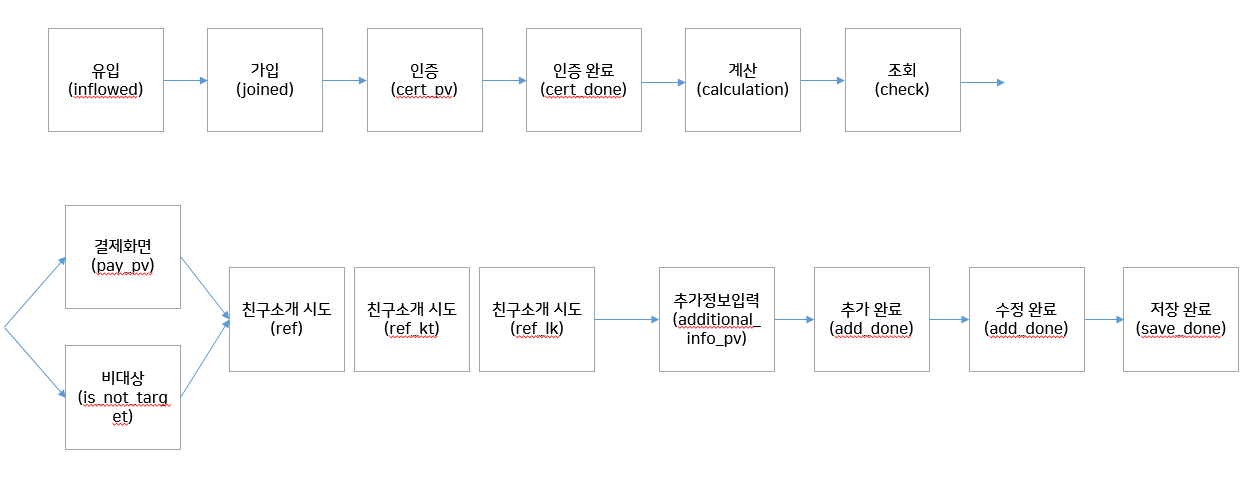

In [15]:
df_base.columns.tolist()

['dates',
 'hours',
 'age_layer',
 'se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target',
 'se_ref',
 'se_ref_kt',
 'se_ref_lk',
 'se_additional_info_pv',
 'se_add_done',
 'se_edit_done',
 'se_save_done',
 'et_inflowed',
 'et_joined',
 'et_cert_pv',
 'et_cert_done',
 'et_tax_calculation',
 'et_tax_check',
 'et_pay_pv',
 'et_is_not_target',
 'et_ref',
 'et_ref_kt',
 'et_ref_lk',
 'et_additional_info_pv',
 'et_add_done',
 'et_edit_done',
 'et_save_done',
 'basic']

## 2.1 집계기준 분리 (category)
- `집계 기준이 될 컬럼`과 `집계 대상이 될 컬럼`을 구분

In [12]:
df_base[['dates', 'hours', 'age_layer']].head()

,dates,hours,age_layer
0,2021-04-29,1,Unknown
1,2021-04-29,4,Unknown
2,2021-04-29,3,Unknown
3,2021-04-28,10,Unknown
4,2021-04-28,21,Unknown


In [21]:
#집계 기준: dates, hours, age_layer
category = ['dates', 'hours', 'age_layer']

In [13]:
df_base['basic'] = 1

## 2.2 가입 (df_signup)

In [19]:
signup = df_base.columns.tolist()[3:11]
signup

['se_inflowed',
 'se_joined',
 'se_cert_pv',
 'se_cert_done',
 'se_tax_calculation',
 'se_tax_check',
 'se_pay_pv',
 'se_is_not_target']

In [23]:
signup_v1 = category + signup

In [24]:
df_signup = df_base[signup_v1]
df_signup.head()

,dates,hours,age_layer,se_inflowed,se_joined,se_cert_pv,se_cert_done,se_tax_calculation,se_tax_check,se_pay_pv,se_is_not_target
0,2021-04-29,1,Unknown,1651164079013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-29,4,Unknown,1651175470863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-29,3,Unknown,1651172275521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-28,10,Unknown,1651107651854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-28,21,Unknown,1651149494804,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_signup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   dates               object 
 1   hours               int64  
 2   age_layer           object 
 3   se_inflowed         int64  
 4   se_joined           float64
 5   se_cert_pv          float64
 6   se_cert_done        float64
 7   se_tax_calculation  float64
 8   se_tax_check        float64
 9   se_pay_pv           float64
 10  se_is_not_target    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 159.7+ MB


In [33]:
for col in df_signup.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_signup[col].isnull().sum() / df_signup[col].shape[0]))
  print(msg)

column:      dates	 Percent of NaN Value: 0.00%
column:      hours	 Percent of NaN Value: 0.00%
column:  age_layer	 Percent of NaN Value: 0.00%
column: se_inflowed	 Percent of NaN Value: 0.00%
column:  se_joined	 Percent of NaN Value: 68.44%
column: se_cert_pv	 Percent of NaN Value: 83.90%
column: se_cert_done	 Percent of NaN Value: 90.43%
column: se_tax_calculation	 Percent of NaN Value: 92.11%
column: se_tax_check	 Percent of NaN Value: 92.36%
column:  se_pay_pv	 Percent of NaN Value: 98.18%
column: se_is_not_target	 Percent of NaN Value: 97.91%


<Axes: >

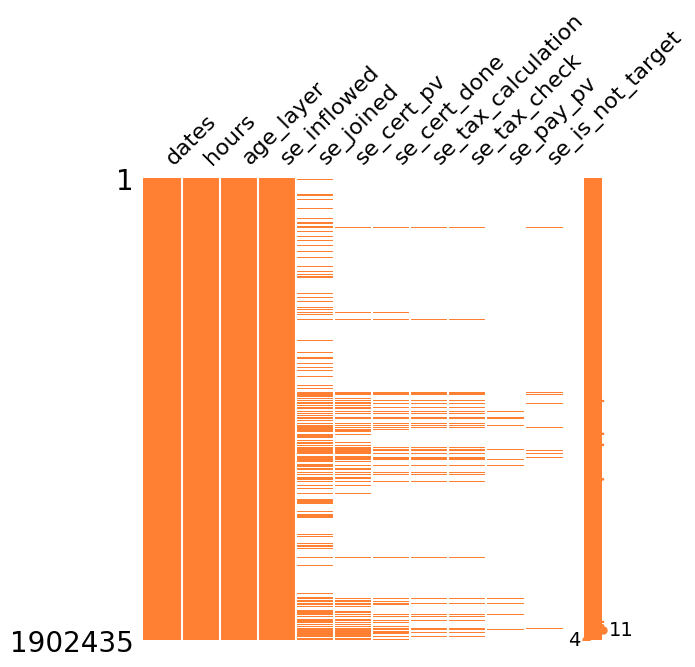

In [26]:
import missingno as msno

msno.matrix(df = df_signup.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

## 2.3 친구 소개 (df_ref)

In [28]:
ref = df_base.columns.tolist()[11:18]

In [29]:
ref_v1 = category + ref
df_ref = df_base[ref_v1]
df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902435 entries, 0 to 1902434
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dates                  object 
 1   hours                  int64  
 2   age_layer              object 
 3   se_ref                 float64
 4   se_ref_kt              float64
 5   se_ref_lk              float64
 6   se_additional_info_pv  float64
 7   se_add_done            float64
 8   se_edit_done           float64
 9   se_save_done           float64
dtypes: float64(7), int64(1), object(2)
memory usage: 145.1+ MB


In [32]:
for col in df_ref.columns:
  msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_ref[col].isnull().sum() / df_ref[col].shape[0]))
  print(msg)

column:      dates	 Percent of NaN Value: 0.00%
column:      hours	 Percent of NaN Value: 0.00%
column:  age_layer	 Percent of NaN Value: 0.00%
column:     se_ref	 Percent of NaN Value: 99.87%
column:  se_ref_kt	 Percent of NaN Value: 99.91%
column:  se_ref_lk	 Percent of NaN Value: 100.00%
column: se_additional_info_pv	 Percent of NaN Value: 99.47%
column: se_add_done	 Percent of NaN Value: 99.98%
column: se_edit_done	 Percent of NaN Value: 99.95%
column: se_save_done	 Percent of NaN Value: 99.51%


CPU times: user 3.64 s, sys: 410 ms, total: 4.05 s
Wall time: 3.97 s


<Axes: >

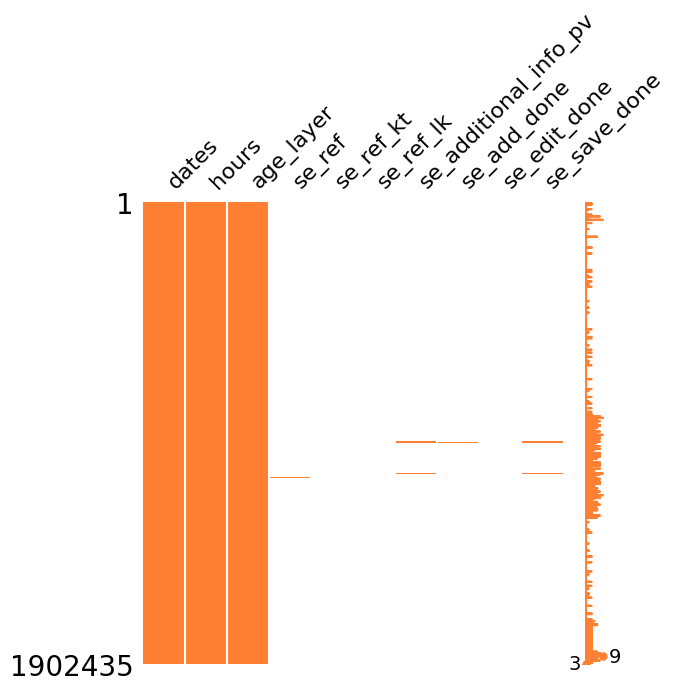

In [31]:
%%time
msno.matrix(df = df_ref.iloc[:, :], figsize=(6, 6), color = (1, 0.5, 0.2))

#_3. 전환율

##3.1 가입 전환율 (df_signup)

##3.2 친구추천 전환율 (df_ref)

#_4. 체류시간